In [1]:
import pandas as pd
import numpy as np
import os
from nice_funcs.indicators import CreateRandomPrtf,EWMA,MACD,RSI,NormalizeWindow,MDD
from ambiente import TradingEnv


def GetIndex(*args):
  indicators = [*args]
  index_init = set(indicators[0].index)
  for ind_ in indicators:
    index_init = index_init & set(ind_.index)
  
  idx_date = min(index_init)
  new_index_indicators = []
  for ind_ in indicators:
    ind_['Cash'] = 0 
    new_index_indicators.append(ind_[idx_date:])
  return new_index_indicators
        


# %%
path_diario = './assets/1d/'
ativos = os.listdir(path_diario)

ativosOHLC = {}
for ativo in ativos:
    ativosOHLC[ativo.replace('.xlsx','')] = \
        pd.read_excel(os.path.join(path_diario,ativo),index_col=0)
    

close_prices = {}
for k in ativosOHLC.keys():
  close_prices[k] = ativosOHLC[k].Close


df_fechamento = pd.DataFrame(close_prices).iloc[:-360]
normalized_fech = df_fechamento.apply(lambda row: NormalizeWindow(row)).dropna()
macd = df_fechamento.apply(lambda row: MACD(row)[0]).dropna()
rsi = df_fechamento.apply(lambda row: RSI(row)).dropna()
ewma_diff = df_fechamento.apply(lambda row: EWMA(row,20) - EWMA(row,5)).dropna()






df_fechamento,normalized_fech,macd,rsi,ewma_diff =  GetIndex(df_fechamento,normalized_fech, macd, rsi, ewma_diff)


env = TradingEnv(df_fechamento,[normalized_fech,macd,rsi,ewma_diff])

<Axes: xlabel='Date'>

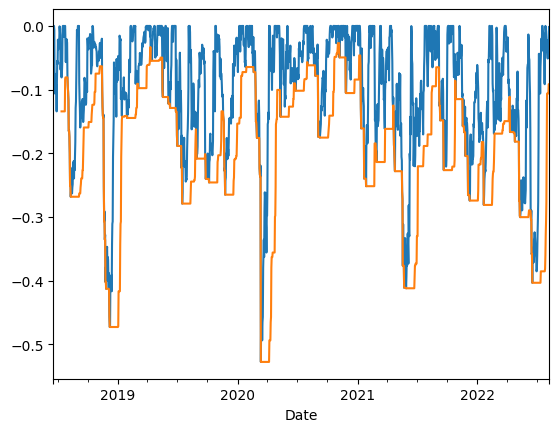

In [19]:
ddd = df_fechamento.apply(lambda row: MDD(row,window=26)[0])
mdd = df_fechamento.apply(lambda row: MDD(row,window=26)[0]).rolling(window=26).min()

In [23]:
df_fechamento.pct_change()

,ADAUSDT,BNBUSDT,BTCUSDT,ETHUSDT,LTCUSDT,XRPUSDT,Cash
Date,,,,,,,
2018-06-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-19,0.020159,-0.003301,0.004283,0.038652,-0.000304,0.017895,NaN
2018-06-20,-0.031018,-0.040482,0.003011,-0.002751,-0.009628,-0.016741,NaN
2018-06-21,-0.024904,0.061913,-0.006311,-0.019218,-0.010233,-0.008513,NaN
2018-06-22,-0.122695,-0.088603,-0.100291,-0.121802,-0.123242,-0.098041,NaN
...,...,...,...,...,...,...,...
2022-08-05,0.035421,0.013149,0.030475,0.080133,0.047276,0.014555,NaN
2022-08-06,-0.011983,-0.002216,-0.015366,-0.026606,-0.026253,-0.013018,NaN
2022-08-07,0.032081,0.024112,0.009592,0.005673,0.004439,0.001884,NaN


In [16]:
c_pord

Date
2018-06-18    1.000000
2018-06-19    1.066329
2018-06-20    0.916335
2018-06-21    0.993772
2018-06-22    0.438850
                ...   
2022-08-05    1.189437
2022-08-06    0.918193
2022-08-07    1.066669
2022-08-08    1.119420
2022-08-09    0.827206
Length: 1514, dtype: float64

In [2]:
normalized_fech

,ADAUSDT,BNBUSDT,BTCUSDT,ETHUSDT,LTCUSDT,XRPUSDT,Cash
Date,,,,,,,
2018-06-18,-1.103457,1.411699,-0.768851,-0.732371,-1.070490,-1.154540,0
2018-06-19,-0.889136,1.337789,-0.651483,-0.300377,-0.973955,-0.923059,0
2018-06-20,-0.982724,0.573641,-0.549649,-0.289839,-0.955627,-0.988063,0
2018-06-21,-1.031417,1.458236,-0.561819,-0.449708,-0.940942,-0.968987,0
2018-06-22,-1.608189,-0.168414,-1.631754,-1.562283,-1.715639,-1.574267,0
...,...,...,...,...,...,...,...
2022-08-05,0.832198,2.062444,0.627964,1.425203,1.684018,0.847826,0
2022-08-06,0.463622,1.777482,0.082091,0.958956,0.919183,0.413158,0
2022-08-07,1.333937,1.825976,0.351730,0.977090,0.953756,0.438750,0


In [3]:
import gymnasium
from ddpg_tf2 import Agent

In [4]:
agent = Agent(input_dims = env.observation_space.shape,\
   env = env, n_actions =env.action_space.shape[0])

ValueError: Please provide to Input a `shape` or a `tensor` or a `type_spec` argument. Note that `shape` does not include the batch dimension.

In [ ]:
obs,_ = env.reset()

**************************************************
Retorno 0.0


In [ ]:
agent.actor(obs)

TypeError: Exception encountered when calling layer 'actor_network' (type ActorNetwork).

'KerasTensor' object is not callable

Call arguments received by layer 'actor_network' (type ActorNetwork):
  • state=tf.Tensor(shape=(4, 7), dtype=float32)

In [ ]:
agent = Agent(input_dims = env.observation_space.shape,\
   env = env, n_actions =env.action_space.shape[0])

n_games = 250
figure_file = 'plots/pendulum.png'
best_score = env.reward_range[0]
score_history = []
load_checkpoint = False

if load_checkpoint:
  n_steps = 0
  while n_steps <= agent.batch_size:
    observation, info = env.reset()
    action = env.action_space.sample()
    observation_, reward, _, done ,info = env.step(action)
    agent.remember(observation, action, reward, observation_, done)
    n_steps +=1
    agent.learn()
    agent.load_models()
    evaluate = True
else:
  evaluate = False

for i in range(n_games):
  observation, info = env.reset()
  done = False
  score = 0
  while not done:
    #print(score)
    action = agent.choose_action(observation, evaluate)
    observation_, reward, _ ,done ,info = env.step(action)
    score += reward
    agent.remember(observation, action, reward, observation_, done)
    #print(done)
    if not load_checkpoint:
      agent.learn()
    observation = observation_
  score_history.append(score)
  avg_score = np.mean(score_history[-100:])

  if avg_score > best_score:
    best_score = avg_score
    if not load_checkpoint:
      agent.save_models()

  print('episode ', i, 'score %.1f' % score,'avg score %1f' % avg_score )



NameError: name 'xxxxxx' is not defined